## EasyOCR Evaluation - 04 - qualitative Analyse

In diesem notebook werden ddie OCR-Ergbnisse von EasyOCR einer qualitativen Analyse unterzogen.  

Dafür werden aus die Bilder mit sehr schlechten und die Bilder mit sehr guten OCR-Ergbnissen aus der jeder Kategorie untersucht.

Ziel ist es, herauszufinden, ob das Modell bei bestimmten Layouts, Schriften, Formaten o. Ä. strukturelle Schwächen zeigt.

Als Grundlage für "schlecht" und "gut" dienen der erreichte WER Werte der zeilenbasierten Evaluation.  
gut : WER<0.11  
schlecht : WER > 070


#### Inhalt:

- allgemein
- [Kategorie simple](#kategorie-simple)
- [Kategorie fancy](#kategorie-fancy)
- [Kategorie noisy](#kategorie-noisy)
- [Kategorie skewed](#kategorie-skewed)
- [Kategorie photo](#kategorie-photo)


---
##### Vorbereitung: dataframes joinen und speichern, damit Infos zu Bildtyp und Metriken gemeinsam verfügbar sind

In [114]:
import pandas as pd

df_pics = pd.read_csv("../../data/image_data_with_groundtruth.csv")
df = pd.read_csv("../../data/OCR/easyocr/easyocr_evaluation_01_0_linewise.csv")

# Nur relevante Spalten
df_pics_little = df_pics[["file_name", "category", "ground_truth"]]

merged_df = df.merge(df_pics_little, on="file_name", how="left")

In [115]:
merged_df.to_csv("../../data/OCR/easyocr/easyocr_evaluation_01_0_linewise_with_category.csv", index=False)

##### importieren des neuen dataframes

In [200]:
import pandas as pd
df = pd.read_csv("../../data/OCR/easyocr/easyocr_evaluation_01_0_linewise_with_category.csv")
df.head(2)

file_name  gt_lines  ocr_lines  matched_lines  mean_cer  mean_wer  \
0  0001.jpg         6          6              6  0.022222  0.250000   
1  0002.jpg         7          7              6  0.194740  0.416667   

   mean_char_acc  mean_word_acc  \
0       0.976984       0.750000   
1       0.799624       0.583333   

                                                                                                                                                                                              ocr_easyocr  \
0                                                                                        ['SPRACHCAFE', 'WEIFNACHTSFEIER', 'DIENSTAG 21.12_', 'OLOF-PALME ZENTRUM', '19 UHR', 'WIR FREUEN UNS AUF EUCH!']   
1  ['SchlIEsst Eucx Any', 'EI Videc & Contert', 'nIchtohneuns_Dresce:', 'KUNDGEBUNG', '#SOLIDARITÄT MIT ALLEN!', 'BerICHTE: WIE WAR DIE BERLIN-DEMO WIRKLICH?', 'Dresden, Großer Garten, 8.8. um 16 Uhr']   

   recognition_rate category  \
0          1.000000    noisy   
1          0.857143    noisy   

                                                                                                                                                                       ground_truth  
0                                                                                      SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12 OLOF-PALME ZENTRUM 19 UHR WIR FREUEN UNS AUF EUCH!  
1  SCHLIESST EUCH AN! ET Video & Content nichtohneuns_Dresden KUNDGEBUNG #SOLIDARITÄT MIT ALLEN! BERICHTE: WIE WAR DIE BERLIN-DEMO WIRKLICH? DRESDEN, GROßER GARTEN, 8.8. UM 16 UHR

---
### allgemein 


In [185]:
df[df['mean_wer'] < 0.11].groupby('category').size()

category
fancy     2
simple    7
skewed    1
dtype: int64

In [186]:
df[df['recognition_rate'] == 1].groupby('category').size()

category
fancy      6
noisy      3
photo      2
simple    19
skewed     4
dtype: int64

In [23]:
# bilder mit perfekter recognition rate
df.loc[df['recognition_rate'] == 1, ['file_name', 'category']]


file_name category
0     0001.jpg    noisy
7     0010.jpg    noisy
14    0017.jpg    noisy
33   0040.jpeg    fancy
52    0064.jpg    fancy
53    0066.jpg    fancy
75    0100.jpg    photo
92    0121.jpg   simple
94    0123.jpg   simple
95    0124.jpg   simple
96   0127.jpeg   simple
97    0128.jpg   simple
103   0134.jpg   simple
106   0137.jpg   simple
109  0142.jpeg   simple
110   0143.jpg   simple
112   0146.jpg   simple
117   0152.jpg   simple
122   0157.jpg   simple
130   0166.jpg   simple
133  0170.jpeg   simple
136   0173.jpg   simple
140   0179.jpg   skewed
156   0199.jpg   skewed
157   0200.jpg   skewed
167   0210.jpg    fancy
170   0213.jpg   simple
174   0217.jpg   simple
177   0220.jpg    fancy
184   0227.jpg    fancy
189   0232.jpg   skewed
190   0233.jpg   simple
193   0236.jpg   simple
199   0242.jpg    photo

Beispiel recognitionrate 1 


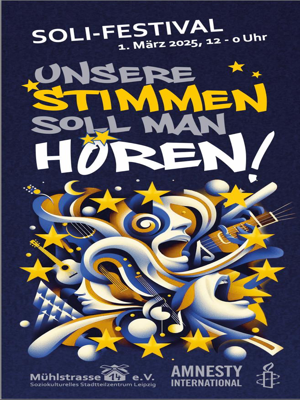

In [196]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0040.jpeg')
img_resized = img.resize((300, 400))
print("Beispiel recognitionrate 1 ")
display(img_resized)

In [198]:
df.iloc[33]['ocr_easyocr']

'[\'SOLI-FESTIVAL\', \'1.\', \'März 2025, 12\', \'UNSERE\', \'STIMMEN\', \'SOLL MAN\', \'HURENI\', \'Mühlstrasse\', \'e.V.\', \'AMNESTY\', \'Soziokulturelles Stadtteilzentrum Leipzig\', \'INTERNATIONAL\', \'"0 Uhr\']'

Beispiel recognitionrate 1 


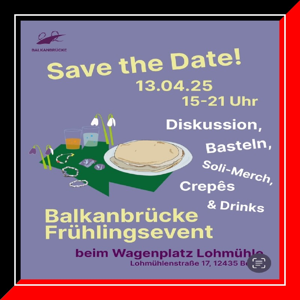

In [147]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0232.jpg')
img_resized = img.resize((300, 300))
print("Beispiel recognitionrate 1 ")
display(img_resized)

In [148]:
df.iloc[189]['ocr_easyocr']

"['BALKANBRUCKE', 'Save the Date!', '13.04.25', '15-21 Uhr', 'Diskussion,', 'Basteln,', 'Crepas', '&', 'Drinks', 'Balkanbrücke', 'Frühlingsevent', 'beim Wagenplatz Lohmühle', 'Lohmühlenstraße 17,12435 Br', 'Soli-Merch,']"

In [39]:
df[df['mean_wer'] > 1][['file_name', 'mean_wer', 'ground_truth', 'ocr_easyocr', 'category']]


file_name  mean_wer                                       ground_truth  \
16   0019.jpg  2.625000  antifaschistische RALLY START BRENNER-BERG ZWI...   
61   0080.jpg  1.043478  Für Demokratie und Menschenrechte: SONNTAGSDEM...   
84   0113.jpg  1.270833  9. MAI 79. JAHRESTAG DES SIEGES ÜBER NAZIDEUTS...   
128  0164.jpg  1.409091  Demokratie verteidigen Demonstration 03.02 15:...   
148  0190.jpg  1.714286  AUF DER AUTOBAHN SPEKTAKEL WORKSHOP 20.11.2022...   

                                           ocr_easyocr category  
16   ['a', 'n t i f a s c h i s t i s c h e', 'RALL...    noisy  
61   ['Für Demokratie und Menscnenecn ~', 'S 0 NN',...    fancy  
84   ['49_', 'MAI', 'NIE', '79', '9MA}', 'DEMOKSTRA...    photo  
128  ['Demokratie', 'verteidigen', 'D e m 0 n $ t r...   simple  
148  ['W 0 R K $ H 0 P', '20,11.2022', 'ZUKUNFT AM ...   skewed

##### ---> es gibt Dateien mit einem WER Wert > 1, weil durch gesperrten Text, Wörter nicht mehr zusammenhängend erkannt werden, sondern jeder Buchtsabe als einzlener Token

Beispiel -simple- schlecht 


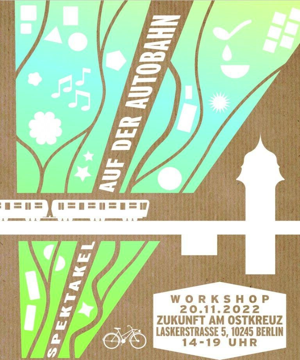

In [209]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0190.jpg')
img_resized = img.resize((300, 360))
print("Beispiel -simple- schlecht ")
display(img_resized)

In [206]:
df.loc[df['file_name'] == '0190.jpg', 'ocr_easyocr']

148    ['W 0 R K $ H 0 P', '20,11.2022', 'ZUKUNFT AM OSTKREUZ', 'LASKERSTRASSE 5, 10245 BERLIN', '14-19', 'UHR', '1', '5', '2', '1']
Name: ocr_easyocr, dtype: object

In [210]:
df.loc[df['file_name'] == '0011.jpg', 'ocr_easyocr']

8    ['SAVETHE DATE', 'Am 11. Januar 2025', 'nach Riesa', 'PROTEST GEGEN DEN AFD', 'BUNDESPARTEITAG', 'STOPPT', 'DIE', 'Aufstehen-gegen-Rassismus .de', 'Saas', 'AfD']
Name: ocr_easyocr, dtype: object

Beispiel -simple- schlecht 


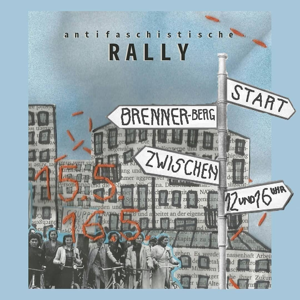

In [199]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0019.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- schlecht ")
display(img_resized)

In [201]:
pd.set_option('display.max_colwidth', None)
df.loc[df['file_name'] == '0019.jpg', 'ocr_easyocr']

16    ['a', 'n t i f a s c h i s t i s c h e', 'RALLY', 'ERENNER-BeRG', 'uolu', 'eW', 'Thiebuns', 'OSL)', 'ang und', 'amer aggres', '[ver', 'eison', 'Und die', 'Ikcr', 'na. D', 'ci', 'ne', 'NA}', 'gens änc', '72w96"', 'verden und', 'und', 'peitet an der eigene', '252', '3uomn', 'IS', 'IkapitaIs zu', 'seln', 'rollen', 'gehen . Es werde}', 'nassenhaft Arbeil', 'de', 'etal', 'tO', 'an', 'Mimionen', 'SC', 'ch', 'ger', 'heihrer', 'Zuku', 'Alte', 'START', 'ZWIsChEN', 'Wa']
Name: ocr_easyocr, dtype: object

In [214]:
df.loc[df['file_name'] == '0054.jpg', 'ocr_easyocr']

44    ['MAGISCHES', 'FÜRSTENFELD', '5. + 6. Januar 2025', 'Zaubervariete', 'für die ganze Famile', 'JANIS VON', 'MARION', 'DETLEE', 'DEM BORNE', 'METTERNICH', 'WINTERBERG']
Name: ocr_easyocr, dtype: object

#### Bilder mit handschriftlichen Elementen:

Beispiel Handschrift


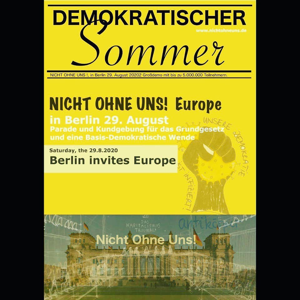

In [187]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0012.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift")
display(img_resized)

In [154]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
df.loc[df['file_name'] == '0012.jpg', 'ocr_easyocr']

9    ['DESOKRATISCHER', 'NICHT OHNE UNS', 'in Berlin 29, August 20202 GroBdemo mit bis zu', '0OO.000 Tailnchmern', 'NICHT OKNE UNS!  Europe', 'in Berlin 29', 'August', 'Parade und Kundgebung fur das Grundgeset ?', 'und eine Basis-Demokratische wende', 'Saturday, the 29.8.2020', 'Berlin invites Europe', 'Kapatelistvs', 'Ohikir', 'Tvuel', 'Nicht Ohne Unsl', 'MnSERE', '}', '2']
Name: ocr_easyocr, dtype: object

Beispiel Handschrift 


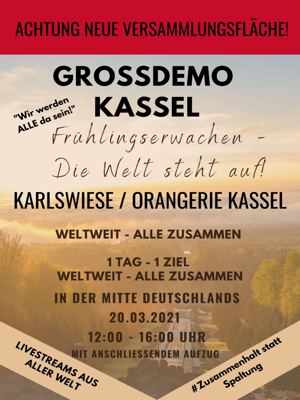

In [188]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0045.jpeg')
img_resized = img.resize((300, 400))
print("Beispiel Handschrift ")
display(img_resized)

In [155]:

df.loc[df['file_name'] == '0045.jpeg', 'ocr_easyocr']

37    ['ACHTUNG NEUE VERSAMMLUNGSFLÄCHE!', 'GROSSDEMO', 'nWir', 'KASSEL', 'do', 'Frühlingserwachen', 'Die', 'Welt steht auf', 'KARLSWIESE / ORANGERIE KASSEL', 'WELTWEIT', 'ALLE ZUSAMMEN', '1 TAG', '1 ZIEL', 'WELTWEIT', 'ALLE ZUSAMMEN', 'IN DER MITTE DEUTSCHLANDS', '20.03.2021', '12:00', '16:00 UHR', 'MIT ANSCHLIESSENDEM AuFZUG', 'werden', 'sein!"', 'ALLE _', 'statt', 'LIVESTREAMS', '#Zusammenhalt', 'ALLER', 'Spaltung', 'AUS', 'WELT']
Name: ocr_easyocr, dtype: object

Beispiel Handschrift 


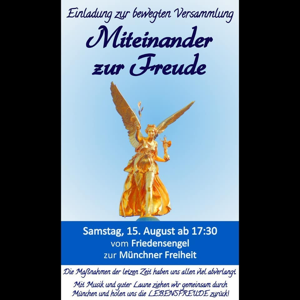

In [189]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0050.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [157]:
df.loc[df['file_name'] == '0050.jpg', 'ocr_easyocr']

41    ['Zur', 'bewegten', 'UViteinander', 'ZUr', 'Treude', 'Samstag, 15. August ab 17.30', 'vom', 'Friedensengel', 'zur', 'Münchner Freiheit', 'Die Maßnahmen der letzen Zeit haben uns allen Yiel abverlangt', 'Mit Musik und', 'Laune ziehen wir gemeinsam durch', "Munchen und holen uns die LEBENSPREUDE zuruck'", 'Einladung', 'Versammlung', '{guter']
Name: ocr_easyocr, dtype: object

Beispiel Handschrift 


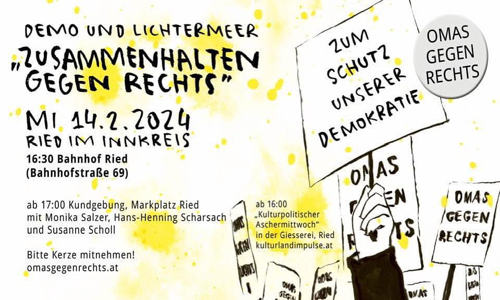

In [190]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0072.jpg')
img_resized = img.resize((500, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [161]:
df.loc[df['file_name'] == '0072.jpg', 'ocr_easyocr']

56    ['DeMo', 'UNd LichTErmeer', '7i', 'ZuSAMMENHALTEN', 'GEGEN RECHTS=', 'P', 'MI', '44.2.2024', 'RIED IM INNKREIS', '16.30 Bahnhof Ried', '(Bahnhofstraße 69)', 'onas', 'ab 17:00 Kundgebung', 'Markplatz Ried', 'ab 16.00', 'DMAs', 'mit Monika Salzer, Hans-Henning Scharsach', 'Kulturpolitischer', 'IceGen', 'und Susanne Scholl', 'Aschermittwoch', 'Ts', 'in der Giesserei, Ried', '[RECHTS', 'kulturlandimpulse.at', 'Bitte Kerze mitnehmen!', 'omasgegenrechts.at', 'OMAS', 'ZuM', 'SChuTZ', 'GEGEN', 'RECHTS', 'Unserer', 'DEMoKPatie']
Name: ocr_easyocr, dtype: object

Beispiel Handschrift 


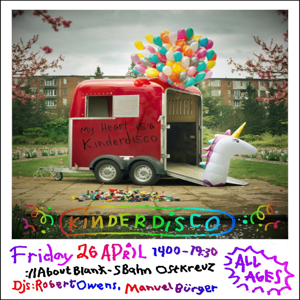

In [191]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0075.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [164]:
df.loc[df['file_name'] == '0075.jpg', 'ocr_easyocr']

59    ['MY Heart', '(5 6', 'KiMDERDiSco', 'Friday %6 APZ)L 7400-7236', ':lAbovt BlanX-SBqhn OstKrevz', 'All', 'Agbs', 'DjF RobertOwenf  Manvel Bürger', 'Kinderdisco', "'(66.", 'nna']
Name: ocr_easyocr, dtype: object

Beispiel Handschrift 


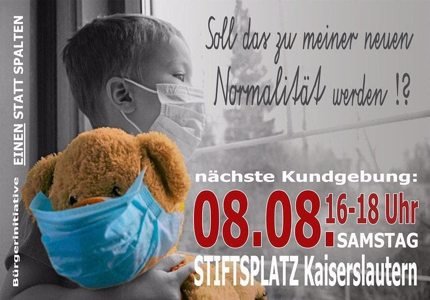

In [192]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0086.jpg')
img_resized = img.resize((430, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [169]:
df.loc[df['file_name'] == '0086.jpg', 'ocr_easyocr']

64    ['1', 'Saut &on ?au wranen Yraen', '5', 'Aomokitih unten 18', '1', 'nächste Kundgebung:', '|', '08.0816485', 'SAMSTAG', 'Uhr', 'STIFTSPLATZ Kaisexslautern']
Name: ocr_easyocr, dtype: object

Beispiel Handschrift 


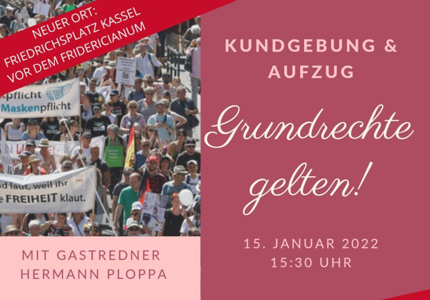

In [193]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0089.jpeg')
img_resized = img.resize((430, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [178]:
df.loc[df['file_name'] == '0089.jpeg', 'ocr_easyocr']

65    ['KUNDGEBUNG &', 'AUFZUG', 'pflicht', 'Maskenpflicht', 'Gundechte', 'd laut, weil ihr', 'FREIHEIT klaut.', '15_', 'JANUAR 2022', 'MIT', 'GASTREDNER', '15:30', 'UHR', 'HERMANN', 'PLOPPA', 'ORT:', 'FRIEDRICHSPLATZ KASSEL', 'NEUER', 'FRIDERICIANUM', 'DEM', 'VOR', '!', 'gelten.']
Name: ocr_easyocr, dtype: object

Beispiel Handschrift 


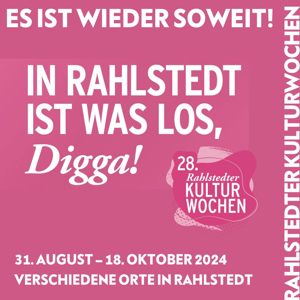

In [194]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0181.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [179]:
df.loc[df['file_name'] == '0181.jpg', 'ocr_easyocr']

142    ['ES IST WIEDER SOWEIT!', 'IN RAHLSTEDT', 'IST WAS LOS,', 'Digga!', '2ucn', '', '31AUGUST - 18. OKTOBER 2024', 'VERSCHIEDENE ORTEIN RAHLSTEDT']
Name: ocr_easyocr, dtype: object

Beispiel Handschrift 


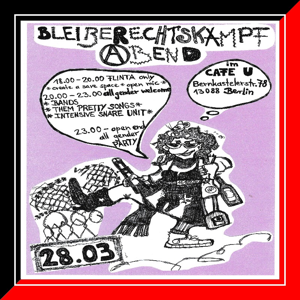

In [195]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0238.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [181]:
df.loc[df['file_name'] == '0238.jpg', 'ocr_easyocr']

195    ['BLEIBERECHTSKXMIPF', 'DEN"', 'A8.00', '20.00 FLINTA', 'Oniy', 'CAFTE', 'creaje', 'save', 'sface', 'Yic', 'Bernkastelersh:.78', 'welcoh', "13088 'Berlin", '20.00', '23.', 'EBPPRETY SoNGS*', "HNTENSNE 'SNARE UNIT*", '00', 'cpeYe', 'all', 'ZRTy', '28@', '0o algehBF ', '23.(']
Name: ocr_easyocr, dtype: object

---

### Kategorie simple

#### Bilder mit gutem WER

In [14]:
# bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.11) & (df['category'] == 'simple'), 'file_name']


92     0121.jpg
94     0123.jpg
95     0124.jpg
97     0128.jpg
103    0134.jpg
106    0137.jpg
136    0173.jpg
Name: file_name, dtype: object

simple- gut 


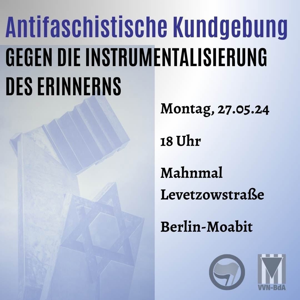

In [25]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0134.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- gut ")
display(img_resized)

#### Bilder mit schlechtem WER

In [24]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'simple'), 'file_name']

98     0129.jpg
104    0135.jpg
123    0158.jpg
128    0164.jpg
192    0235.jpg
Name: file_name, dtype: object

Beispiel -simple- schlecht 


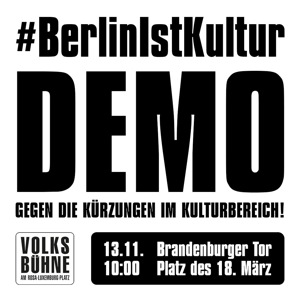

In [26]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0129.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- schlecht ")
display(img_resized)

In [27]:
df.iloc[98]['ocr_easyocr']

"['#Berlinlstkultur', 'IeNU', 'GEGEN DlE KÜRZUIGEN IMI KULTURBEREICH!', 'VOLKS', '13.11.   Brandenburger Ior', 'BUHNE', '10-00', 'Platz des 18. Iärz', 'aM RosA-LuxeMBURG platZ']"

Beispiel -simple- schlecht 


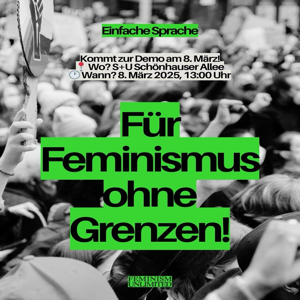

In [28]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0135.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- schlecht ")
display(img_resized)

In [29]:
df.iloc[104]['ocr_easyocr']

"['EinfacheSprache', 'Kommtzur Demoam 8 Märzg', 'Wo? S+Uschönhauser Allee', 'Wann? 8.März2025, 1300Uhr', 'Für', 'Feminismus', 'Iohne', 'Grenzenl', 'FEMINSM', 'UNLMIED']"

Beispiel -simple- schlecht 


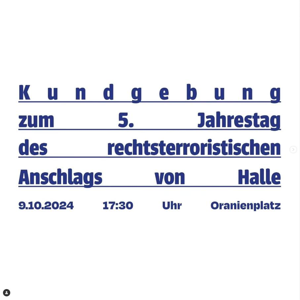

In [30]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0158.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- schlecht ")
display(img_resized)

In [31]:
df.iloc[123]['ocr_easyocr']

"['Kund9ebung', 'zum', '5', 'Jahrestag', 'des_', 'rechtsterroristischen', 'Anschlags', 'von', 'Halle', '9.10.2024', '17830', 'Uhr', 'Oranienplatz']"

Beispiel -simple- schlecht 


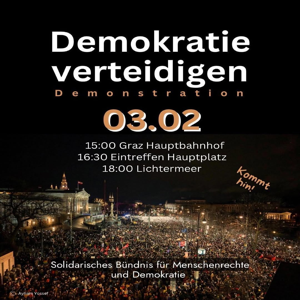

In [32]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0164.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- schlecht ")
display(img_resized)

In [33]:
df.iloc[128]['ocr_easyocr']

"['Demokratie', 'verteidigen', 'D e m 0 n $ t r a t i 0 n', '03.02', '15.00 Graz Hauptbahnhof', '16.30 Eintreffen Hauptplatz', '18.00 Lichtermeer', 'Solidarisches Bündnis für Menschenrechte', 'und Demokratie', 'Ayham Yossef', 'Kommt', 'hin!']"

In [34]:
df.iloc[128]['mean_wer']

1.4090909090909092

Beispiel -simple- schlecht 


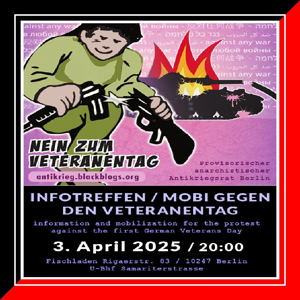

In [40]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0235.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- schlecht ")
display(img_resized)

In [41]:
df.iloc[192]['ocr_easyocr']

"['ainst any', 'Bonhbi', 'ZXJTio] 6=', 'NPnz', 'nuogon', '7pn', 'SaTaa', '399i', '25', 'Inst any', 'War', 'Io', 'bo9 bonhbi', 'uJsk', '7pny', '8', 'estanyWar', 'Hbi', 'NEIN 24M', 'VETERANENTAG', 'Provisorischer', 'anarchistischer', 'antikrieg-blackblogs.org', 'Antikriegsrat', 'Berlin', 'INFOTREFFEN', 'MOBI GEGEN', 'DEN', 'VETERANENTAG', 'information', 'and', 'mobilization', 'for', 'the', 'protest', 'against', 'the', 'first', 'German', 'Veterans', 'Day', '3', 'April 2025', '1 20:00', 'Fischladen', 'Rigaerstr', '83', '10247', 'Berlin', 'U-Bhf', 'Samariterstrasse']"

---

### Kategorie fancy

#### Bilder mit gutem WER

In [42]:
# bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.11) & (df['category'] == 'fancy'), 'file_name']

52     0064.jpg
177    0220.jpg
Name: file_name, dtype: object

Beispiel -fancy- gut 


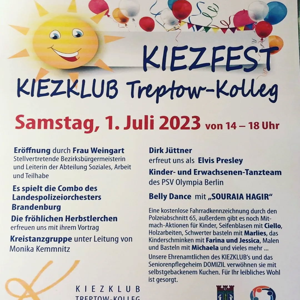

In [43]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0064.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- gut ")
display(img_resized)

In [44]:
df.iloc[52]['ocr_easyocr']

'[\'KIEZFEST\', \'KIEZKLUB Trptow-Kolleg\', \'Samstag, 1.Juli 2023\', \'von 14 - 18 Uhr\', \'Eröffnung durch Frau Weingart\', \'Dirk Jüttner\', \'Stellvertretende Bezirksbürgermeisterin\', \'erfreut uns als Elvis Presley\', \'und Leiterin der Abteilung Soziales, Arbeit\', \'Kinder- und Erwachsenen-Tanzteam\', \'und Teilhabe\', \'des PSV Olympia Berlin\', \'Es spielt die Combo des\', \'Landespolizeiorchesters\', \'Belly Dance mit ,SOURAIA HAGIR"\', \'Brandenburg\', \'Eine kostenlose Fahrradkennzeichnung durch den\', \'Die fröhlichen Herbstlerchen\', \'Polzeiabschnitt 65, außerdem gibt es noch Mit-\', \'erfreuen uns mit ihrem Vortrag\', \'mach-Aktionen für Kinder, Seifenblasen mit Ciello;\', \'Holzarbeiten, Schwerter basteln mit Marlies; das\', \'Kreistanzgruppe unter Leitung von\', \'Kinderschminken mit Farina und Jessica, Malen\', \'Monika Kemmnitz\', \'und Basteln mit Michaela und vieles mehr\', "Unsere Ehrenamtlichen des KIEZKLUB\'s und das", \'Seniorenpflegeheim DOMIZIL verwöhnen si

Beispiel -fancy- gut 


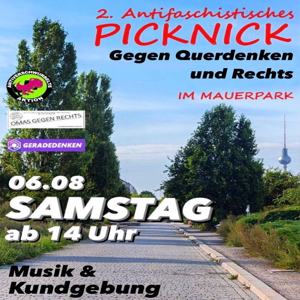

In [45]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0220.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- gut ")
display(img_resized)

In [46]:
df.iloc[177]['ocr_easyocr']

"['2. Antifaschistisches', 'PICKNICK', 'Gegen Querdenken', 'und Rechts', 'IM MAUERPARK', 'GERADEDENKEN', '08.08', 'SAMSTAG', 'ab 14 Uhr', 'Musik &', 'Kundgebung', 'Atio :', 'RECHTS', 'GEGEN', 'OMAS']"

#### Bilder mit schlechtem WER

In [47]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'fancy'), 'file_name']

30      0036.jpg
31     0037.jpeg
32     0039.jpeg
36      0044.jpg
38     0046.jpeg
47      0059.jpg
48      0060.jpg
50      0062.jpg
55      0071.jpg
59      0075.jpg
61      0080.jpg
63      0082.jpg
67      0091.jpg
160     0203.jpg
167     0210.jpg
168     0211.jpg
169     0212.jpg
171     0214.jpg
187     0230.jpg
188     0231.jpg
195     0238.jpg
Name: file_name, dtype: object

Beispiel -fancy- schlecht 


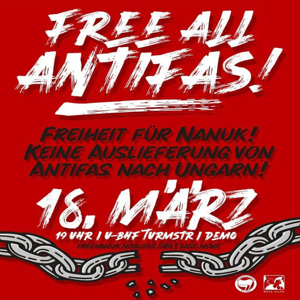

In [51]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0037.jpeg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [52]:
df.iloc[31]['ocr_easyocr']

'[\'Iree AlJ\', \'ANTIaS\', \'Freiheit FÜR NANUK!\', \'Keine AusLiEFERUnG VON\', \'ANTIFAS NACH UNGARN!\', "16 M\'kz", \'19 VHR | V-BHF TVRMsir| DEMO\', \'1\', "E4s\'€ ,"]'

Beispiel -fancy- schlecht 


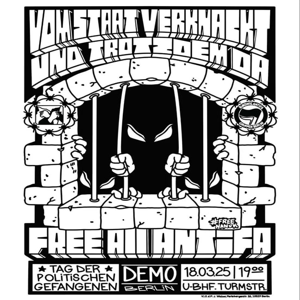

In [55]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0039.jpeg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [56]:
df.iloc[32]['ocr_easyocr']

"['MhmA', '07Ey', '#free', '44', 'TAG DER', 'DEMO18032511992', 'POLiTiSCHEN', 'GEFANGENEN', 'BERUN', 'U-BHF TURMSTR']"

Beispiel -fancy- schlecht 


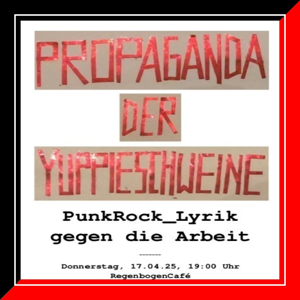

In [66]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0230.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [67]:
df.iloc[187]['ocr_easyocr']

"['FRDFAGANDA', 'DER', 'YIFFEIuEINE', 'PunkRock_Lyrik', 'gegen', 'die', 'Arbeit', 'Donnerstag ,', '17.04 . 25', '19:00', 'Uhr', 'Regenbogencafe']"

Beispiel -fancy- schlecht 


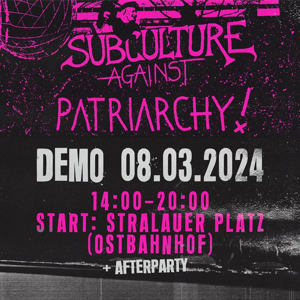

In [68]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0210.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [69]:
df.iloc[167]['ocr_easyocr']

"['SBLOTURE', '4GAINST', 'PATRIARCHY {', 'DEIIO  08.03.2024', '14:00-20:00', 'START: SIRALAUER PLATI', '(O8TBÄHiHOF)', 'AFTERPARTY']"

Beispiel -fancy- schlecht 


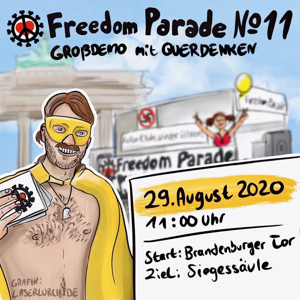

In [73]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0071.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [74]:
df.iloc[55]['ocr_easyocr']

"['Freedom Porade |?11', 'GropdeMo at QeerdeMKeN', '6', 'recoom Pran', '29.Avgusl 2020', '11 :00', 'Brandeabufger Cor', 'Seare: !', 'Grafir:', '2;eL;', 'Siogessävle', 'Laserlurchde', 'Uhf']"

Beispiel -fancy- schlecht 


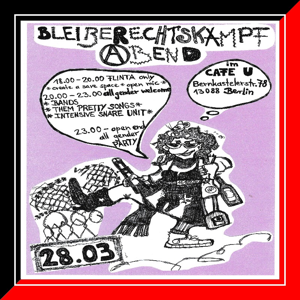

In [75]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0238.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [77]:
df.iloc[195]['ocr_easyocr']

'[\'BLEIBERECHTSKXMIPF\', \'DEN"\', \'A8.00\', \'20.00 FLINTA\', \'Oniy\', \'CAFTE\', \'creaje\', \'save\', \'sface\', \'Yic\', \'Bernkastelersh:.78\', \'welcoh\', "13088 \'Berlin", \'20.00\', \'23.\', \'EBPPRETY SoNGS*\', "HNTENSNE \'SNARE UNIT*", \'00\', \'cpeYe\', \'all\', \'ZRTy\', \'28@\', \'0o algehBF \', \'23.(\']'

---

### Kategorie noisy

#### Bilder mit gutem WER 
unter der Schwelle 0.11 gibt es keine bilder -> Schwelle erhöht auf 0.15

In [79]:
# bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.15) & (df['category'] == 'noisy'), 'file_name']

3     0004.jpg
19    0023.jpg
Name: file_name, dtype: object

004.jpg ist falsch kategorisiert - müsste eigentlich zu simple gehören

Beispiel -noisy- gut


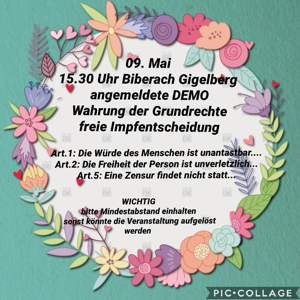

In [81]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0023.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- gut")
display(img_resized)

In [82]:
df.iloc[19]['ocr_easyocr']

"['09', 'Mai', '15.30 Uhr Biberach Gigelberg', 'angemeldete DEMO', 'Wahrung der Grundrechte', 'freie Impfentscheidung', 'Art.1: Die Würde des Menschen ist unantastbar._', 'Art.2: Die Freiheit der Person ist unverletzlich.', 'Art.5: Eine Zensur findet nicht statt.', 'WICHTIG', 'bitte Mindestabstand einhalten', 'sonst könnte die Veranstaltung aufgelöst', 'werden', '2', 'PIC COLLAGE']"

#### Bilder mit schlechtem WER

In [83]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'noisy'), 'file_name']

2     0003.jpg
4     0006.jpg
12    0015.jpg
16    0019.jpg
22    0026.jpg
25    0029.jpg
Name: file_name, dtype: object

0003.jpg und 0006.jpg sind an der Grenze zu Kategorie simple udn weniger typisch für noisy

Beispiel -noisy- schlecht


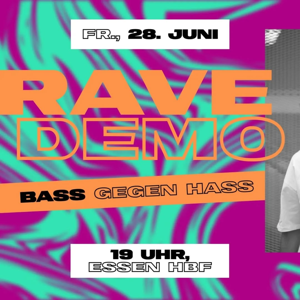

In [86]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0015.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- schlecht")
display(img_resized)

In [87]:
df.iloc[12]['ocr_easyocr']

"['28', 'JUNI', 'pEM ', 'BASS GEGZN', '[HIASS', '19', 'UHR', 'ESSEN', 'HBF', 'FROq']"

Beispiel -noisy- schlecht


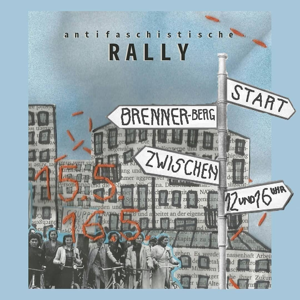

In [88]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0019.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- schlecht")
display(img_resized)

In [89]:
df.iloc[16]['ocr_easyocr']

'[\'a\', \'n t i f a s c h i s t i s c h e\', \'RALLY\', \'ERENNER-BeRG\', \'uolu\', \'eW\', \'Thiebuns\', \'OSL)\', \'ang und\', \'amer aggres\', \'[ver\', \'eison\', \'Und die\', \'Ikcr\', \'na. D\', \'ci\', \'ne\', \'NA}\', \'gens änc\', \'72w96"\', \'verden und\', \'und\', \'peitet an der eigene\', \'252\', \'3uomn\', \'IS\', \'IkapitaIs zu\', \'seln\', \'rollen\', \'gehen . Es werde}\', \'nassenhaft Arbeil\', \'de\', \'etal\', \'tO\', \'an\', \'Mimionen\', \'SC\', \'ch\', \'ger\', \'heihrer\', \'Zuku\', \'Alte\', \'START\', \'ZWIsChEN\', \'Wa\']'

Beispiel -noisy- schlecht


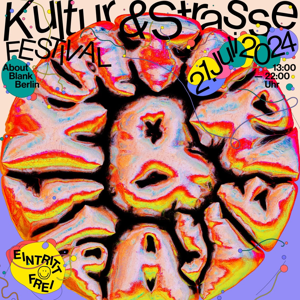

In [90]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0026.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- schlecht")
display(img_resized)

In [92]:
df.iloc[22]['ocr_easyocr']

"['KUtu &Sthasse', 'FESIVAL', 'About', '13:00', 'Blank', '22-00', 'Berlin', 'Uhi', '21Jul?820', 'EIntrl', '<Re']"

Beispiel -noisy- schlecht


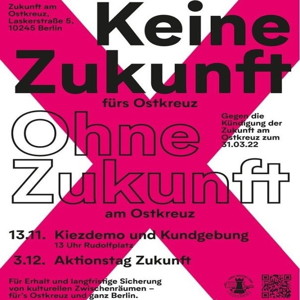

In [93]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0029.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- schlecht")
display(img_resized)

In [94]:
df.iloc[25]['ocr_easyocr']


"['Zukunftam', 'Ostkreuz', 'Loskes sealie', 'Keine', 'Zukunft', 'fürs Ostkreuz', 'die', 'Kun', 'gung der', 'unft am', '@hne', 'itrezz zum', 'Zukunft', 'am', 'Ostkreuz', '13,71.Kiezdemo und Kundgebung', '13 Uhr Rudolfplat', '3.12. Aktionstag Zukun', 'Für Erhalt und langfrisfige Sicherung', 'von kulturellen', 'chenräumen', 'fürs Ostkreuz und ganz Berlin:', 'Gegen', 'Zwis']"

---

### Kategorie skewed

#### Bilder mit gutem WER
Schwelle wurde auf 0.20 erhöht

In [100]:
# bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.20) & (df['category'] == 'skewed'), 'file_name']

140    0179.jpg
156    0199.jpg
172    0215.jpg
Name: file_name, dtype: object

Beispiel -skewed- gutt


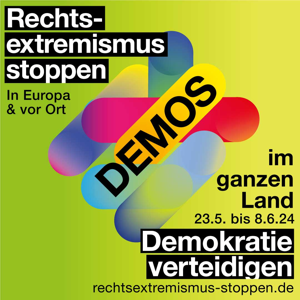

In [103]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0179.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -skewed- gutt")
display(img_resized)

In [104]:
df.iloc[140]['ocr_easyocr']

"['Rechts-', 'extremismus', 'stoppen', 'In Europa', '& vor Ort', 'im', 'ganzen', 'Land', '23.5. bis 8.6.24', 'Demokratie', 'verteidigen', 'rechtsextremismus-stoppen de', 'DEMOS']"

---> gute Wert nur bei bildern, die nur ein schräg gestelltes Textelement haben auf ruhigen untergrund und diese der Kategorie simple zuzuordnen gwesen wären

#### Bilder mit schlechtem WER

In [105]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'skewed'), 'file_name']

148    0190.jpg
149    0191.jpg
152    0195.jpg
164    0207.jpg
181    0224.jpg
Name: file_name, dtype: object

Beispiel -skewed- schlecht


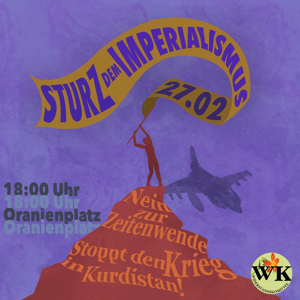

In [107]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0191.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -skewed- schlecht")
display(img_resized)

In [108]:
df.iloc[149]['ocr_easyocr']

"['Sua', '[denKries', '(AnDSKOMIE', 'ininsy', '57uRL', '27.02', 'Nein', 'Zeitenwvende', 'Stoppt', 'inKurdistani']"

Beispiel -skewed- schlecht


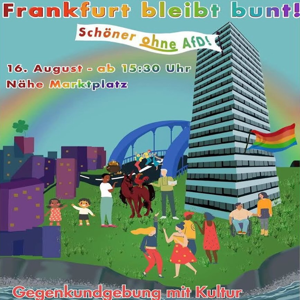

In [112]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0207.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -skewed- schlecht")
display(img_resized)

In [113]:
df.iloc[164]['ocr_easyocr']

"['Frankfuri bleilf buntl', 'AfD!', '16. August', '@ 15830 Ubr', 'Nähe Markkfplatz', 'Gegenkundgebung mi} Kullur', 'Schöner', 'ohne']"

---

### Kategorie photo

#### Bilder mit gutem WER 
---> bei Schwellenwert 0.25 nur ein Bild, darunter gar keins

In [121]:
# bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.25) & (df['category'] == 'photo'), 'file_name']

75    0100.jpg
Name: file_name, dtype: object

Beispiel -photo- gut


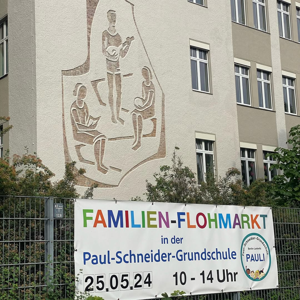

In [124]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0100.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -photo- gut")
display(img_resized)

In [123]:
df.iloc[75]['ocr_easyocr']

"['5ha', '12,8', 'FAMILIEN-FLOHMARKT', 'in der', 'BxUn-Lenkru', 'Paul-Schneider-Grundschule', 'PAULI', '25,05.24', '10 - 14 Uhr', 'schneider (', '1']"

#### Bilder mit schlechtem WER

In [128]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'photo'), 'file_name']

69     0094.jpg
81     0110.jpg
84     0113.jpg
85     0114.jpg
196    0239.jpg
Name: file_name, dtype: object

Beispiel -photo- schlecht


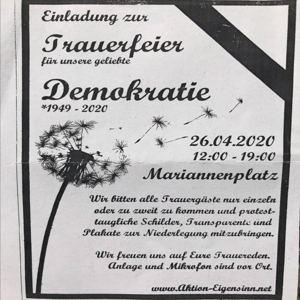

In [129]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0094.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -photo- schlecht")
display(img_resized)

In [130]:
df.iloc[69]['ocr_easyocr']

"['Ginladung', '7wt', 'Snauexßeies', 'Pü unsee', 'gelielte', 'Demaknatie', '*1949', '2020', '26.04.2020', '12.00', '19:00', 'Matiannenplatz', 'Wi Bitten alle Snauengäste nux einzeln', 'ade Zu zweit zu Rammen und pnatest-', 'taugliche Schildex, Snanspwlente und', 'JlaRate zw', 'Niededegung mitzubuingen.', 'Wu Pleuen uns aup Suxe Jnauexeden', 'und Mlikxafon oind vax Unt', 'wuw (etion-Eigenoinnnet', 'Cnlage']"

Beispiel -photo- schlecht


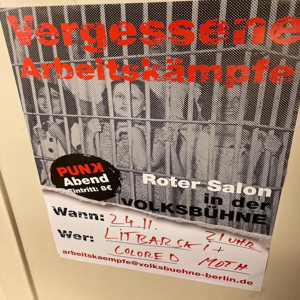

In [131]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0239.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -photo- schlecht")
display(img_resized)

In [132]:
df.iloc[196]['ocr_easyocr']

"['Herglssssbe', 'Fhbeiesranrgfe', '8€', '4', 'PUNA', 'Abend', 'Roter', 'Salon', 'Hintritt:', 'M', 'Ga', 'OUKSunus', 'Wanenz', '2l41', 'CiTcal Sk', 'Mer:', '21', 'Ut2', 'CoLole', 'arbeitskaempfe@volksbuehne-berlin-de', 'Moz#']"